In [76]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [77]:
data = pd.read_csv('MCI_2014_to_2019.csv')

In [78]:
data.shape            

(206435, 29)

In [79]:
data.columns

Index(['X', 'Y', 'Index_', 'event_unique_id', 'occurrencedate', 'reporteddate',
       'premisetype', 'ucr_code', 'ucr_ext', 'offence', 'reportedyear',
       'reportedmonth', 'reportedday', 'reporteddayofyear',
       'reporteddayofweek', 'reportedhour', 'occurrenceyear',
       'occurrencemonth', 'occurrenceday', 'occurrencedayofyear',
       'occurrencedayofweek', 'occurrencehour', 'MCI', 'Division', 'Hood_ID',
       'Neighbourhood', 'Long', 'Lat', 'ObjectId'],
      dtype='object')

In [80]:
data.head()

,X,Y,Index_,event_unique_id,occurrencedate,reporteddate,premisetype,ucr_code,ucr_ext,offence,...,occurrencedayofyear,occurrencedayofweek,occurrencehour,MCI,Division,Hood_ID,Neighbourhood,Long,Lat,ObjectId
0,-79.405228,43.656982,7801,GO-20152165447,2015-12-18T03:58:00.000Z,2015-12-18T03:59:00.000Z,Commercial,1430,100,Assault,...,352.0,Friday,3,Assault,D14,79,University (79),-79.405228,43.656982,7001
1,-79.307907,43.778732,7802,GO-20151417245,2015-08-15T21:45:00.000Z,2015-08-17T22:11:00.000Z,Commercial,1430,100,Assault,...,227.0,Saturday,21,Assault,D42,118,Tam O'Shanter-Sullivan (118),-79.307907,43.778732,7002
2,-79.225029,43.765942,7803,GO-20151421107,2015-08-16T16:00:00.000Z,2015-08-18T14:40:00.000Z,Apartment,2120,200,B&E,...,228.0,Sunday,16,Break and Enter,D43,137,Woburn (137),-79.225029,43.765942,7003
3,-79.140823,43.778648,7804,GO-20152167714,2015-11-26T13:00:00.000Z,2015-12-18T13:38:00.000Z,Other,2120,200,B&E,...,330.0,Thursday,13,Break and Enter,D43,133,Centennial Scarborough (133),-79.140823,43.778648,7004
4,-79.288361,43.691235,7805,GO-20152169954,2015-12-18T19:50:00.000Z,2015-12-18T19:55:00.000Z,Commercial,1430,100,Assault,...,352.0,Friday,19,Assault,D55,61,Taylor-Massey (61),-79.288361,43.691235,7005


Let's see if there is any missing data. If there is we drop na objects.

In [81]:
data.isna().sum()

X                       0
Y                       0
Index_                  0
event_unique_id         0
occurrencedate          0
reporteddate            0
premisetype             0
ucr_code                0
ucr_ext                 0
offence                 0
reportedyear            0
reportedmonth           0
reportedday             0
reporteddayofyear       0
reporteddayofweek       0
reportedhour            0
occurrenceyear         59
occurrencemonth        59
occurrenceday          59
occurrencedayofyear    59
occurrencedayofweek    59
occurrencehour          0
MCI                     0
Division                0
Hood_ID                 0
Neighbourhood           0
Long                    0
Lat                     0
ObjectId                0
dtype: int64

In [82]:
data.dropna(inplace=True)

In [83]:
data.shape

(206376, 29)

In [84]:
def plot_freq(data, var, title):
    
    
    labels = np.unique(data[var])
    sizes = []
    plt.title(title)
    for label in labels:
        
        sizes.append((data[var]==label).sum())
    
    #
    plt.pie(sizes, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)

Exploring the data. Let's make a few pie plots to see any data insights. 

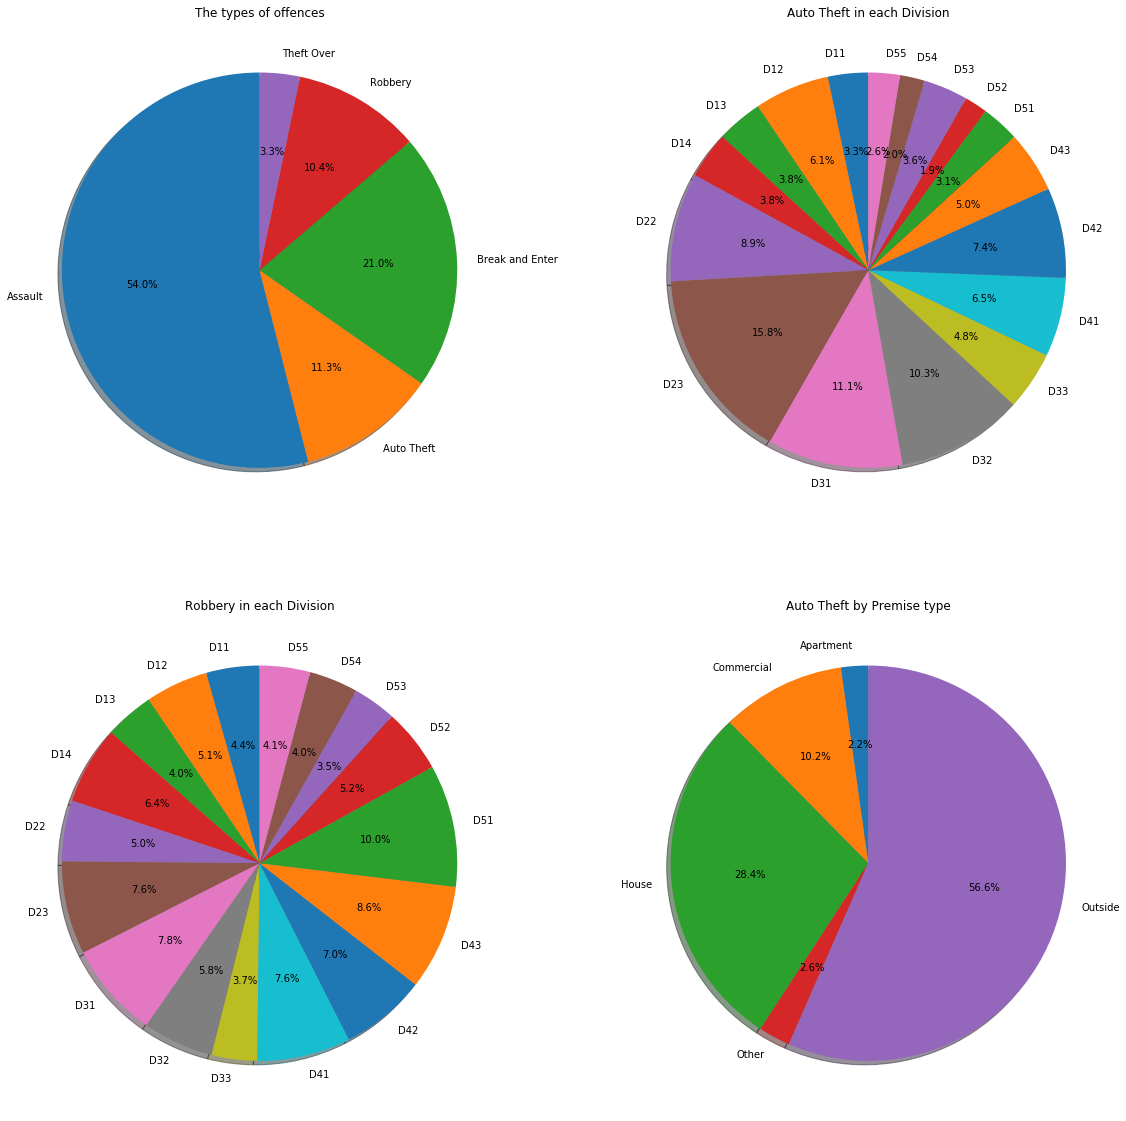

In [85]:
plt.figure(figsize=(20, 20))
plt.subplot(221)
plot_freq(data, 'MCI', 'The types of offences')
plt.subplot(222)
plot_freq(data[data.MCI=='Auto Theft'], 'Division', 'Auto Theft in each Division')
plt.subplot(223)
plot_freq(data[data.MCI=='Robbery'], 'Division', 'Robbery in each Division')
plt.subplot(224)
plot_freq(data[data.MCI=='Auto Theft'], 'premisetype', 'Auto Theft by Premise type')
plt.show()

1. As we can see from the data Assault is the most often crime that occurs. 
2. Also, we can see that D52 has just 1.9% of all the Auto Theft, on the other hand D23 has 15.8% of the Auto Theft.
3. There are more than twice robberies in D41 than in D53.
4. Auto Theft happens outside 56.6% out of all Auto Thefts. 

In [86]:
data.columns

Index(['X', 'Y', 'Index_', 'event_unique_id', 'occurrencedate', 'reporteddate',
       'premisetype', 'ucr_code', 'ucr_ext', 'offence', 'reportedyear',
       'reportedmonth', 'reportedday', 'reporteddayofyear',
       'reporteddayofweek', 'reportedhour', 'occurrenceyear',
       'occurrencemonth', 'occurrenceday', 'occurrencedayofyear',
       'occurrencedayofweek', 'occurrencehour', 'MCI', 'Division', 'Hood_ID',
       'Neighbourhood', 'Long', 'Lat', 'ObjectId'],
      dtype='object')

In [89]:
data.to_pickle("data.pkl")